In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df_data = pd.read_csv('data/cleaned/Netty-Unified.csv')
df_data = df_data.iloc[:, 1:]
df_data

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0.0,0,0,0,0.0,0.0,0,0,1,1,...,2,0,2,0,2,8,0,2,0,0
1,0.0,0,0,0,0.0,0.0,0,0,5,0,...,5,0,5,0,5,5,0,5,0,0
2,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,0,0.0,0.0,0,0,1,0,...,9,0,9,0,9,1,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0.0,0,0,0,0.0,0.0,0,0,1,0,...,3,0,1,0,3,3,0,1,0,0
1140,0.0,0,0,0,0.0,0.0,0,0,2,0,...,2,0,2,0,5,3,0,5,0,0
1141,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1143 non-null   float64
 1   CCL     1143 non-null   int64  
 2   CCO     1143 non-null   int64  
 3   CI      1143 non-null   int64  
 4   CLC     1143 non-null   float64
 5   CLLC    1143 non-null   float64
 6   LDC     1143 non-null   int64  
 7   LLDC    1143 non-null   int64  
 8   LCOM5   1143 non-null   int64  
 9   NL      1143 non-null   int64  
 10  NLE     1143 non-null   int64  
 11  WMC     1143 non-null   int64  
 12  CBO     1143 non-null   int64  
 13  CBOI    1143 non-null   int64  
 14  NII     1143 non-null   int64  
 15  NOI     1143 non-null   int64  
 16  RFC     1143 non-null   int64  
 17  AD      1143 non-null   float64
 18  CD      1143 non-null   float64
 19  CLOC    1143 non-null   int64  
 20  DLOC    1143 non-null   int64  
 21  PDA     1143 non-null   int64  
 22  

In [63]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.151581,0.707787,3.302712,1.026247,0.133842,0.142677,12.008749,10.869641,1.913386,1.133858,...,7.433946,0.729659,5.684164,0.486439,20.007874,31.619423,1.158355,15.196850,0.857393,0.237095
std,0.304463,2.107114,12.836547,3.760241,0.284517,0.293378,42.411977,39.711984,3.570950,1.557008,...,17.127899,5.709815,14.664878,2.144422,30.370925,78.821760,6.014747,25.189313,3.094789,0.425487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,11.000000,8.000000,0.000000,8.000000,0.000000,0.000000
75%,0.124412,1.000000,1.000000,1.000000,0.083508,0.107361,6.000000,6.000000,2.000000,2.000000,...,7.000000,0.000000,5.000000,0.000000,23.000000,29.000000,0.000000,17.000000,0.000000,0.000000
max,1.000000,29.000000,221.000000,64.000000,1.000000,1.000000,749.000000,737.000000,71.000000,15.000000,...,327.000000,106.000000,270.000000,19.000000,327.000000,1142.000000,106.000000,270.000000,26.000000,1.000000


In [156]:
# metric correlations- (step 1)

In [64]:
df_data.corr('spearman')

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
CC,1.000000,0.966143,0.955764,0.960305,0.999520,0.999637,0.954009,0.953187,0.076498,0.221346,...,0.169560,0.033332,0.229958,0.118746,0.089186,0.261465,0.018597,0.125366,0.073599,0.104616
CCL,0.966143,1.000000,0.993207,0.996843,0.967334,0.967224,0.988773,0.989075,0.130060,0.318387,...,0.295030,0.064218,0.329984,0.189198,0.193974,0.378501,0.044480,0.221661,0.144450,0.146275
CCO,0.955764,0.993207,1.000000,0.994051,0.956778,0.957324,0.989964,0.990963,0.140911,0.343952,...,0.312360,0.076048,0.337305,0.186834,0.206084,0.399174,0.060906,0.228477,0.147349,0.146133
CI,0.960305,0.996843,0.994051,1.000000,0.961361,0.961439,0.992139,0.992578,0.140266,0.326020,...,0.310727,0.065418,0.338943,0.190683,0.200830,0.393906,0.045041,0.224338,0.142536,0.144085
CLC,0.999520,0.967334,0.956778,0.961361,1.000000,0.999712,0.954920,0.954005,0.078184,0.222626,...,0.170235,0.031784,0.229749,0.118884,0.092064,0.262522,0.017623,0.127770,0.072548,0.105454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNOS,0.261465,0.378501,0.399174,0.393906,0.262522,0.262658,0.419376,0.420868,0.486711,0.810387,...,0.842795,0.118369,0.701459,0.339458,0.610512,1.000000,0.079398,0.573818,0.336363,0.315607
TNPA,0.018597,0.044480,0.060906,0.045041,0.017623,0.020003,0.051652,0.053042,-0.008306,0.124225,...,0.028783,0.625556,0.031377,0.043542,-0.035732,0.079398,1.000000,-0.031856,0.058482,0.036286
TNPM,0.125366,0.221661,0.228477,0.224338,0.127770,0.125469,0.240453,0.242039,0.473203,0.374078,...,0.659748,0.005628,0.661326,0.246604,0.948426,0.573818,-0.031856,1.000000,0.450239,0.318739
TNS,0.073599,0.144450,0.147349,0.142536,0.072548,0.073257,0.146534,0.149970,0.169801,0.242156,...,0.379676,0.129374,0.277485,0.716634,0.484989,0.336363,0.058482,0.450239,1.000000,0.143405


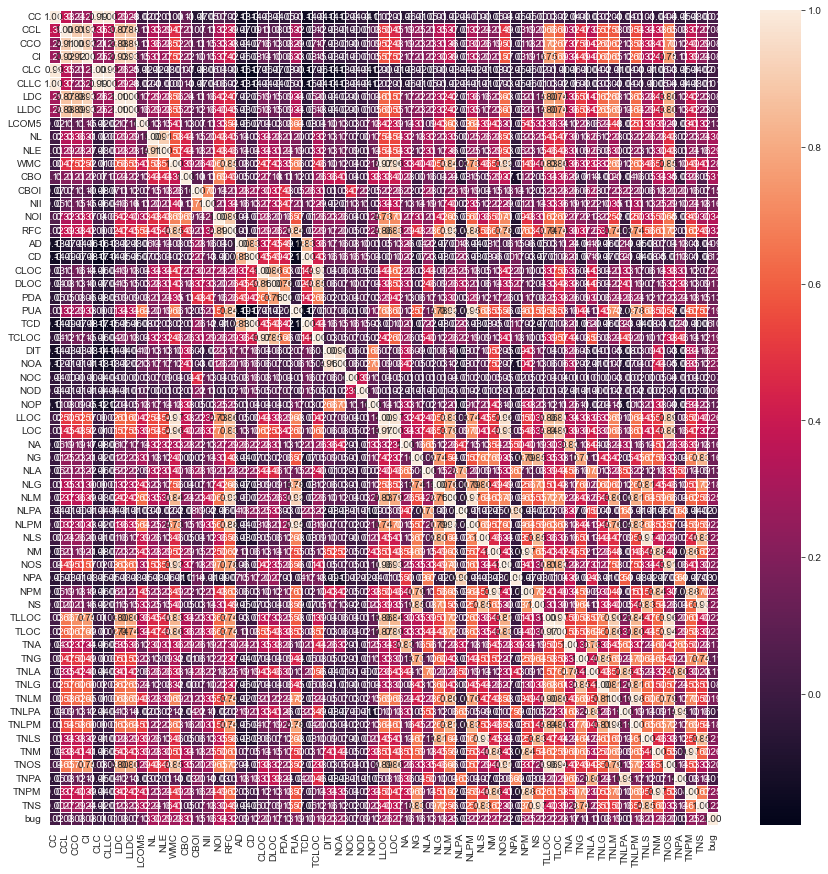

In [65]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [3]:
cor_matrix = df_data.corr('spearman').abs()

In [4]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

      CC       CCL       CCO        CI       CLC      CLLC       LDC  \
CC   NaN  0.966143  0.955764  0.960305  0.999520  0.999637  0.954009   
CCL  NaN       NaN  0.993207  0.996843  0.967334  0.967224  0.988773   
CCO  NaN       NaN       NaN  0.994051  0.956778  0.957324  0.989964   
CI   NaN       NaN       NaN       NaN  0.961361  0.961439  0.992139   
CLC  NaN       NaN       NaN       NaN       NaN  0.999712  0.954920   
...   ..       ...       ...       ...       ...       ...       ...   
TNOS NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNPA NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNPM NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNS  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
bug  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          LLDC     LCOM5        NL  ...      TNLM     TNLPA     TNLPM  \
CC    0.953187  0.076498  0.221346  ...  0.169560  0.033332  0

In [5]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC', 'LLDC', 'NLE', 'WMC', 'NII', 'NOI', 'RFC', 'CD', 'CLOC', 'DLOC', 'PDA', 'TCD', 'TCLOC', 'NOA', 'NOD', 'NOP', 'LLOC', 'LOC', 'NLA', 'NLG', 'NLM', 'NLPM', 'NM', 'NOS', 'NPM', 'NS', 'TLLOC', 'TLOC', 'TNA', 'TNG', 'TNLA', 'TNLG', 'TNLM', 'TNLPA', 'TNLPM', 'TNLS', 'TNM', 'TNOS', 'TNPA', 'TNPM', 'TNS']


In [6]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [7]:
df_data.shape

(1143, 15)

In [12]:
# Variance inflation factor analysis  (VIF) - setp 2

In [8]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [9]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1143, 14)
y: (1143,)


In [10]:
vif(X)

,Feature,VIFscore
14,NPA,6.089450
12,NLPA,5.557335
7,PUA,3.032039
13,NLS,2.499111
10,NA,2.188456
11,NG,1.970198
2,LCOM5,1.773438
4,CBO,1.562880
8,DIT,1.506994
3,NL,1.498200


In [ ]:
#Drop

In [11]:
X= X.drop(labels='NPA',axis='columns')

In [12]:
vif(X)

,Feature,VIFscore
7,PUA,3.032017
13,NLS,2.497516
10,NA,1.964367
11,NG,1.962945
2,LCOM5,1.768733
4,CBO,1.555166
12,NLPA,1.535375
5,CBOI,1.489412
8,DIT,1.477949
3,NL,1.477708


In [13]:
X.columns

Index(['CC', 'LCOM5', 'NL', 'CBO', 'CBOI', 'AD', 'PUA', 'DIT', 'NOC', 'NA',
       'NG', 'NLPA', 'NLS'],
      dtype='object')

In [ ]:
#resampling

Classes: [0, 1]
Counts: [872, 271]


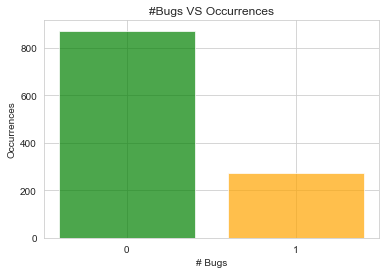

In [14]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [22]:
#oversampling using SMOTE up to 30%

In [15]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [16]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

NameError: name 'y_train_over_sampled' is not defined

In [17]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

NameError: name 'y_train_over_sampled' is not defined

In [18]:
# does not require resampling
X_train_over_sampled = X
y_train_over_sampled = y
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [19]:
data

,CC,LCOM5,NL,CBO,CBOI,AD,PUA,DIT,NOC,NA,NG,NLPA,NLS,bug
0,0.0,1,1,0,0,0.000000,3,0,0,0,1,0,0,0
1,0.0,5,0,7,1,0.000000,6,1,1,0,0,0,0,0
2,0.0,0,0,0,6,0.000000,1,0,0,0,0,0,0,0
3,0.0,0,0,1,2,0.000000,1,1,0,0,0,0,0,0
4,0.0,1,0,1,4,0.000000,10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0
1139,0.0,1,0,1,0,0.500000,1,1,0,1,1,0,0,0
1140,0.0,2,0,2,0,0.333333,2,2,0,2,0,0,0,0
1141,0.0,0,0,0,0,1.000000,0,0,0,0,0,0,0,0


In [20]:
# save the dataset for c5
filename = 'Netty.csv'
data.to_csv('data/cleaned/expr1/{}'.format(filename),sep=',')

In [174]:
# Model Construction

In [21]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)


Train: (800, 13) (800,) Test: (172, 13) (172,) Cross Validation (171, 13) (171,)


In [22]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [23]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [24]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [25]:
scores = {}

In [85]:
# classifiers after removing multi columnary and over sampling

In [26]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 0.1, 'n_estimators': 200}


accuracy: 84.30232558139535 %
recall: 64.72719522591646 %
ROC: 64.72719522591645 %


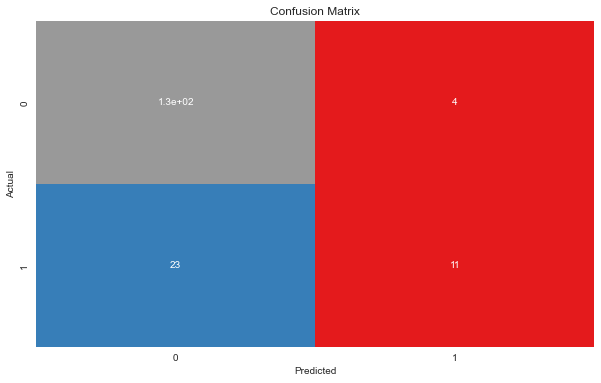

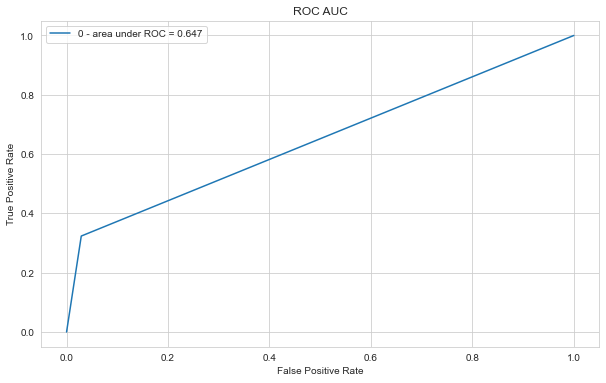

In [28]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

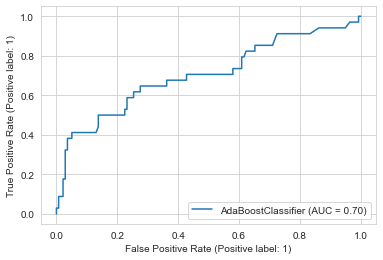

In [29]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [32]:

xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[12:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 83.72093023255815 %
recall: 68.79795396419436 %
ROC: 68.79795396419438 %


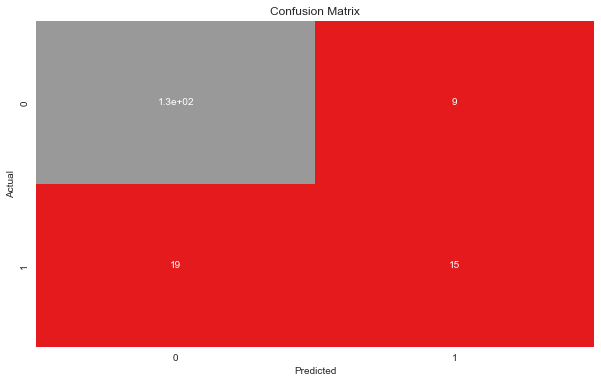

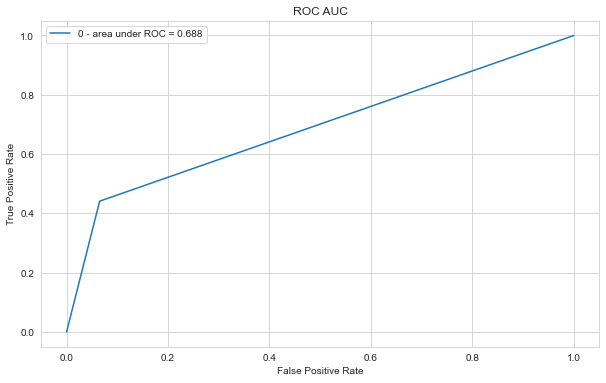

In [33]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

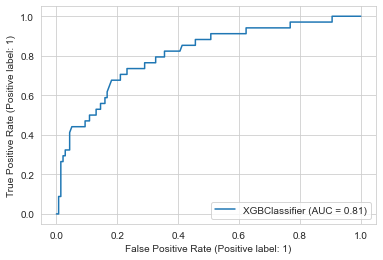

In [34]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [35]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.7, 'n_estimators': 200}


accuracy: 84.88372093023256 %
recall: 69.5225916453538 %
ROC: 69.5225916453538 %


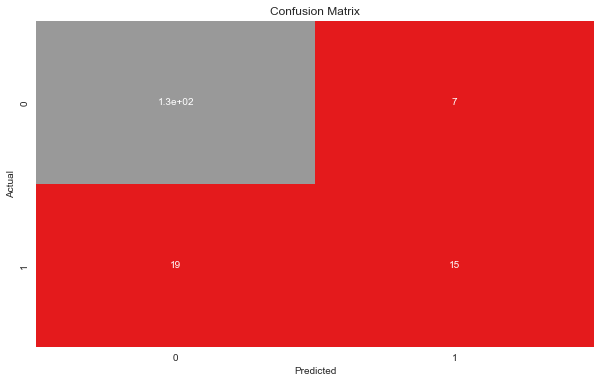

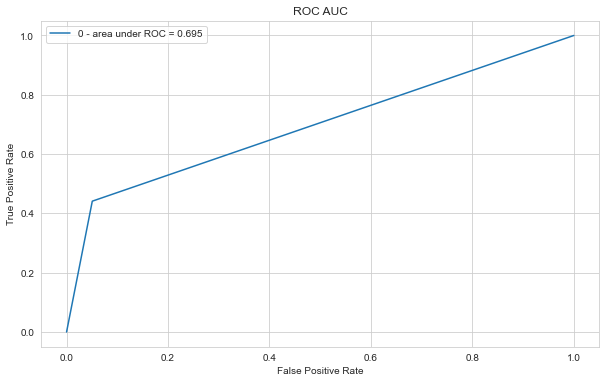

In [36]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

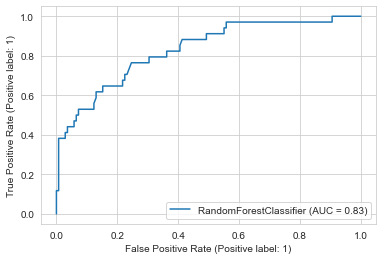

In [37]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [38]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['linear','rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


accuracy: 81.97674418604652 %
recall: 55.52003410059676 %
ROC: 55.52003410059676 %


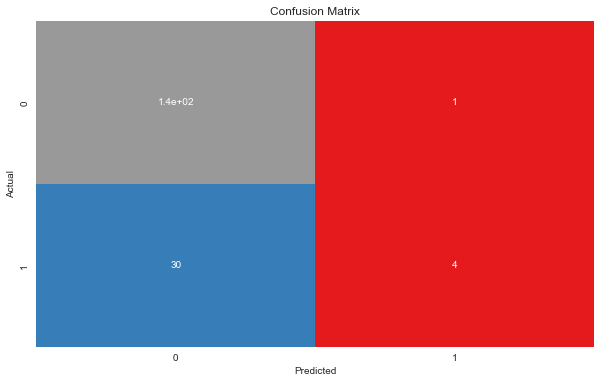

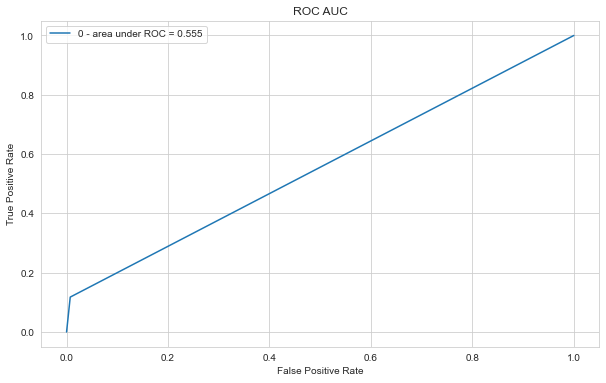

In [39]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

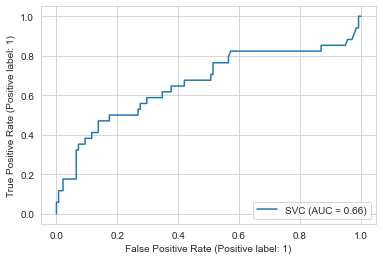

In [40]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [42]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 75.0 %
recall: 55.605285592497864 %
ROC: 55.605285592497864 %


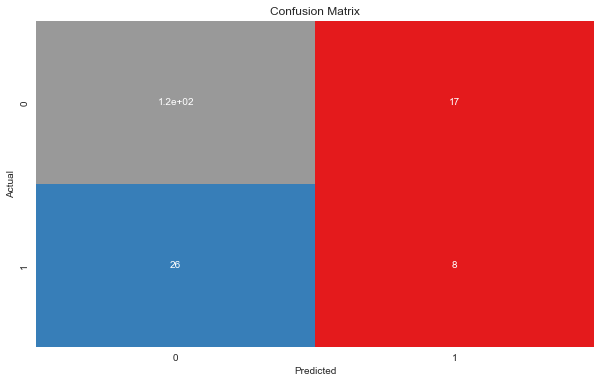

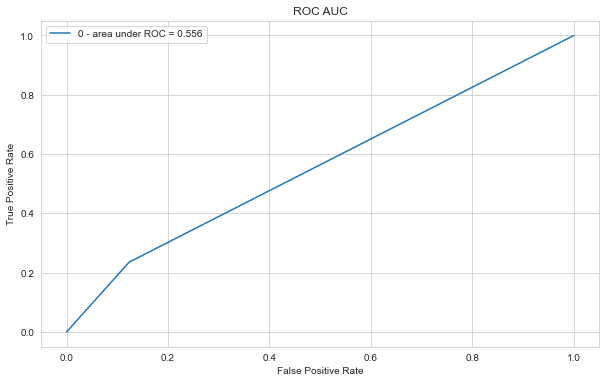

In [43]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

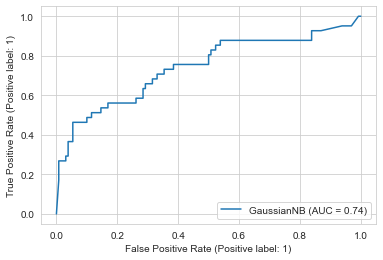

In [44]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Model Evaluation Comparision

In [45]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [46]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
Random Forest | Binary,84.88,69.52,72.27,69.52,83.03
XGBoost | Binary,83.72,68.80,70.97,68.80,80.67
Naive Bayes | Binary,75.00,55.61,56.02,55.61,74.22
AdaBoost Classifier | Binary,84.30,64.73,67.87,64.73,70.40
Support-Vector Machine | Binary,81.98,55.52,55.17,55.52,66.07
